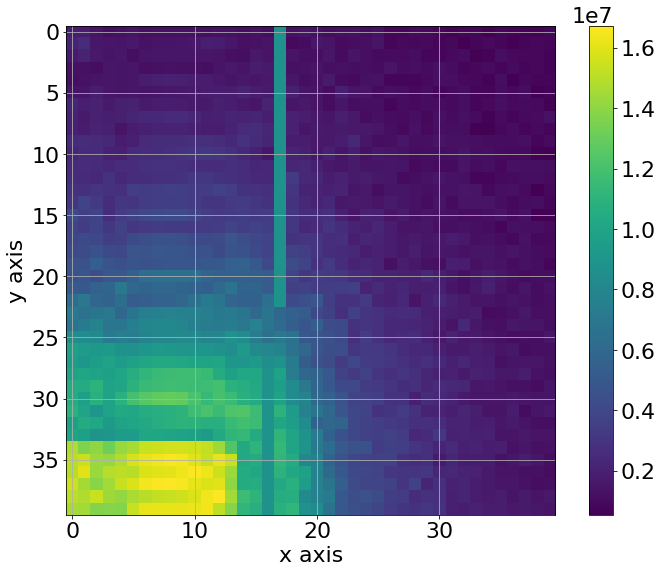

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel, LinearModel
from lmfit import Model, Minimizer, Parameters, report_fit

import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


data = pd.read_pickle('asher_20230603_hyperspec_EL2_98.pkl')

im = data['im']
wavel = data['wavelength']
map = np.sum(im, axis = 2)
# pixel numbers x and y
px = len(im)
py = len(im[0])
intensity = np.zeros((px,py))
#total intensity plot
plt.figure(figsize=(12,9))
plt.grid()
plt.imshow(map, cmap='viridis')
plt.colorbar()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

# Fit R2

In [14]:
# regionx,regiony = 0,39
regionx,regiony = 39,10
ramanData = pd.read_csv('secondRaman - EL2-98.csv')
ramanI = np.array(ramanData['I'])
# ramanW = ramanData['W']
# ramanIndex = ramanData['Index']

In [15]:
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    scale = params['scale']
    a = params['a']
    b = params['b']
    c = params['c']
    model = a*x**2+b*x+c
    return model + scale * ramanI[300:500] - data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 4
    chi-square         = 385733.961
    reduced chi-square = 1968.03041
    Akaike info crit   = 1520.91716
    Bayesian info crit = 1534.11043
[[Variables]]
    scale:  0.39025101 +/- 0.02103908 (5.39%) (init = 1)
    a:      0.40002098 +/- 0.22916041 (57.29%) (init = 0)
    b:     -423.703470 +/- 281.222767 (66.37%) (init = 0)
    c:      113613.590 +/- 86263.6376 (75.93%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)     = -1.000
    C(b, c)     = -1.000
    C(a, c)     = 1.000
    C(scale, a) = 0.799
    C(scale, b) = -0.798
    C(scale, c) = 0.797


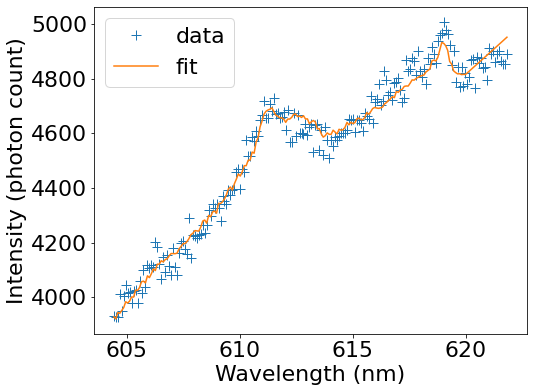

In [16]:
Index = list(range(300,500))
currentPL = data['im'][regionx][regiony]
# create a set of Parameters
params = Parameters()
params.add('scale', value=1, min=0)
params.add('a', value=0)
params.add('b', value=0.0)
params.add('c', value=0)

# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(wavel[Index], currentPL[Index]))
result = minner.minimize()

# calculate final result
# final = data + result.residual

# write error report
# report_fit(result)
# myfig=plt.figure(figsize=(15,15))
# plt.plot(wavel[Index], currentPL[Index], '+', markersize = 20)
# plt.plot(wavel[Index], currentPL[Index] + result.residual)
# plt.show()

report_fit(result)

plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))

plt.plot(wavel[Index]-1.8, currentPL[Index], '+', markersize = 10, label = 'data')
plt.plot(wavel[Index]-1.8, currentPL[Index] + result.residual, label = 'fit')

plt.ylabel('Intensity (photon count)')
plt.xlabel('Wavelength (nm)')

plt.legend()
# plt.show()
plt.tight_layout()

fig.savefig('second raman fit - 2.eps', format= 'eps',transparent=True)

